## Task 1: To Load and Preprocess the data set

### Questions to be answered:
##### Q1 - How many wines are included in the data set? 
##### Q2 - Are all the wines unique, and if not, how many unique wines are there?
##### Q3 - Are there any missing or invalid values in the data?
##### Q4 - Is the scale of the different attributes approximately equal?

In [1]:
# import all the relevant libraries
%matplotlib inline
import pandas as pd                #library for data manipulation and analysis
import seaborn as sns              #used for data visualization
import matplotlib as mpl           #used for plotting graphs
import matplotlib.pyplot as plt    #used for creating figures and p[lotting graphs
import numpy as np                 #numerical python library for performing mathematical operations
import sklearn                     #provides supervised and unsupervised learning algorithms
import sklearn.linear_model


In [2]:
#read the wine data set 
df = pd.read_csv('winedata.csv', sep=';', error_bad_lines = False)   #read the file in csv format


b'Skipping line 3149: expected 12 fields, saw 13\nSkipping line 4821: expected 12 fields, saw 13\n'


In [3]:
#display the first 5 values to know that the data set has been read using the head function
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.9940000000000001,3.3,0.49,9.5,6
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.057999999999999996,47.0,186.0,0.9956,3.19,0.4,9.9,6
4,7.2,0.23,0.32,8.5,0.057999999999999996,47.0,186.0,0.9956,3.19,0.4,9.9,6


In [4]:
#get the information of the data set using the info() function.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 12 columns):
fixed acidity           4891 non-null float64
volatile acidity        4891 non-null object
citric acid             4843 non-null object
residual sugar          4886 non-null object
chlorides               4890 non-null object
free sulfur dioxide     4888 non-null object
total sulfur dioxide    4889 non-null object
density                 4890 non-null object
pH                      4890 non-null object
sulphates               4892 non-null object
alcohol                 4890 non-null object
quality                 4892 non-null object
dtypes: float64(1), object(11)
memory usage: 459.1+ KB


In [5]:
# This code checks the data type in each column using the dtype keyword.
df.dtypes

fixed acidity           float64
volatile acidity         object
citric acid              object
residual sugar           object
chlorides                object
free sulfur dioxide      object
total sulfur dioxide     object
density                  object
pH                       object
sulphates                object
alcohol                  object
quality                  object
dtype: object

In [6]:
# use pd.numeric() method to change object to float values for all the given attributes
# change all the values mentioned below  to float value
df['quality']= pd.to_numeric(df['quality'], errors = 'coerce')
df['volatile acidity']= pd.to_numeric(df['volatile acidity'], errors = 'coerce')
df['citric acid']= pd.to_numeric(df['citric acid'], errors = 'coerce')
df['residual sugar']= pd.to_numeric(df['residual sugar'], errors = 'coerce')
df['chlorides']= pd.to_numeric(df['chlorides'], errors = 'coerce')
df['free sulfur dioxide']= pd.to_numeric(df['free sulfur dioxide'], errors = 'coerce')
df['total sulfur dioxide']= pd.to_numeric(df['total sulfur dioxide'], errors ='coerce')
df['density']= pd.to_numeric(df['density'], errors = 'coerce')
df['pH']= pd.to_numeric(df['pH'], errors = 'coerce')
df['sulphates']= pd.to_numeric(df['sulphates'], errors = 'coerce')
df['alcohol']= pd.to_numeric(df['alcohol'], errors = 'coerce')

In [7]:
# get the changed information about the data set by calling the info function again.
df.info() # values are now represented as floating point values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 12 columns):
fixed acidity           4891 non-null float64
volatile acidity        4890 non-null float64
citric acid             4842 non-null float64
residual sugar          4885 non-null float64
chlorides               4889 non-null float64
free sulfur dioxide     4887 non-null float64
total sulfur dioxide    4888 non-null float64
density                 4889 non-null float64
pH                      4889 non-null float64
sulphates               4891 non-null float64
alcohol                 4889 non-null float64
quality                 4794 non-null float64
dtypes: float64(12)
memory usage: 459.1 KB


### Observation : we observe that all values have been converted to float

In [8]:
# view the basic statistical feeatures using the describe() method.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4891.000000,4890.000000,4842.000000,4885.000000,4889.000000,4887.000000,4888.000000,4889.000000,4889.000000,4891.000000,4889.000000,4794.000000
mean,6.855030,0.278244,0.334292,6.395609,0.045779,35.329036,138.406199,0.994028,3.188116,0.489812,10.514211,5.876929
std,0.844023,0.100828,0.120942,5.074504,0.021863,17.014816,42.506828,0.002992,0.150950,0.114096,1.230556,0.884692
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991730,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Solution 1: The number of wines included in the data set are = 4869

In [9]:
# Now we count the number of wines in the data set i.e. the number of rows in the data set
count_row = df.shape[0]   # count the number of rows iun the matrix
print(count_row)          # print the number of counted rows.

4896


In [10]:
# Select duplicate rows excluding the first occurrence based on all columns
duprows = df[df.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")  # print the number of duplicate rows
print(duprows)                                                              # print duplicate rows

Duplicate Rows except first occurrence based on all columns are :
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4               7.2              0.23         0.32             8.5      0.058   
5               8.1              0.28         0.40             6.9      0.050   
7               7.0              0.27         0.36            20.7      0.045   
8               6.3              0.30         0.34             1.6      0.049   
20              6.2              0.66         0.48             1.2      0.029   
...             ...               ...          ...             ...        ...   
4826            6.4              0.23         0.35            10.3      0.042   
4848            7.0              0.36         0.35             2.5      0.048   
4849            6.4              0.33         0.44             8.9      0.055   
4854            7.1              0.23         0.39            13.7      0.058   
4878            6.6              0.34      

In [11]:
#to calculate the sum of total number of the duplicate values in the data set
df.duplicated().sum()

884

### Observation : we observe that number of duplicate rows are 884

### Solution 2: Number of unique wines - Remove duplicate values from total values to get 4012 (i.e. 4896-884=4012) where 884 wines are duplicate.

In [12]:
# This code displays the unique values in the column 'quality'
df.quality.unique()

array([ 6.,  5.,  7.,  8.,  4., nan,  3.,  9.])

In [13]:
np.sum(df.isna())     # get all the NAN values and their sum

fixed acidity             5
volatile acidity          6
citric acid              54
residual sugar           11
chlorides                 7
free sulfur dioxide       9
total sulfur dioxide      8
density                   7
pH                        7
sulphates                 5
alcohol                   7
quality                 102
dtype: int64

## Solution 3: Calculate missing or invalid values NAN.
#### Missing or invalid values in the data for each attributes are as follow:
##### 1. fixed acidity 5
##### 2.volatile acidity 6
##### 3.citric acid 54
##### 4.residual sugar 11
##### 5.chlorides 7
##### 6.free sulfur dioxide 9
##### 7.total sulfur dioxide 8
##### 8.density 7
##### 9.pH 7
##### 10.sulphates 5
##### 11.alcohol 7
##### 12.quality 102

In [14]:
#drop the missing values and the values where the NAN=True values.
df = df.dropna()   #use dropna() to drop missing values
print (df)         #print the data set

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4891            6.2              0.21         0.29             1.6      0.039   
4892            6.6              0.32         0.36             8.0      0.047   
4893            6.5              0.24         0.19             1.2      0.041   
4894            5.5              0.29         0.30             1.1      0.022   
4895            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [15]:
# detect missing values
# NaN as True, every other value including space as False
df.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4891,False,False,False,False,False,False,False,False,False,False,False,False
4892,False,False,False,False,False,False,False,False,False,False,False,False
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
#get the result in the form of a matrix but keep the firdt occurence of duplicate rows.
df = df.drop_duplicates(keep='first') # remove duplicated values but only keep duplicates in first row
df.shape                              # get the row and coloumn of the matrix after duplicates have been removed

(3859, 12)

### Observation:  Now 3859 values are ready for visualization

## Task 2: Visualise the data

## Questions to be answered:
### Question 1: Plot histogram and comment on your understanding.
### Question 2: Calculate correlation with 'quality'. Which 3 attributes are most correlated with quality? For each of these 3 attributes, display a scatter plot of that attribute against quality. Comment on what you observe.

### Solution 1 is as follows:

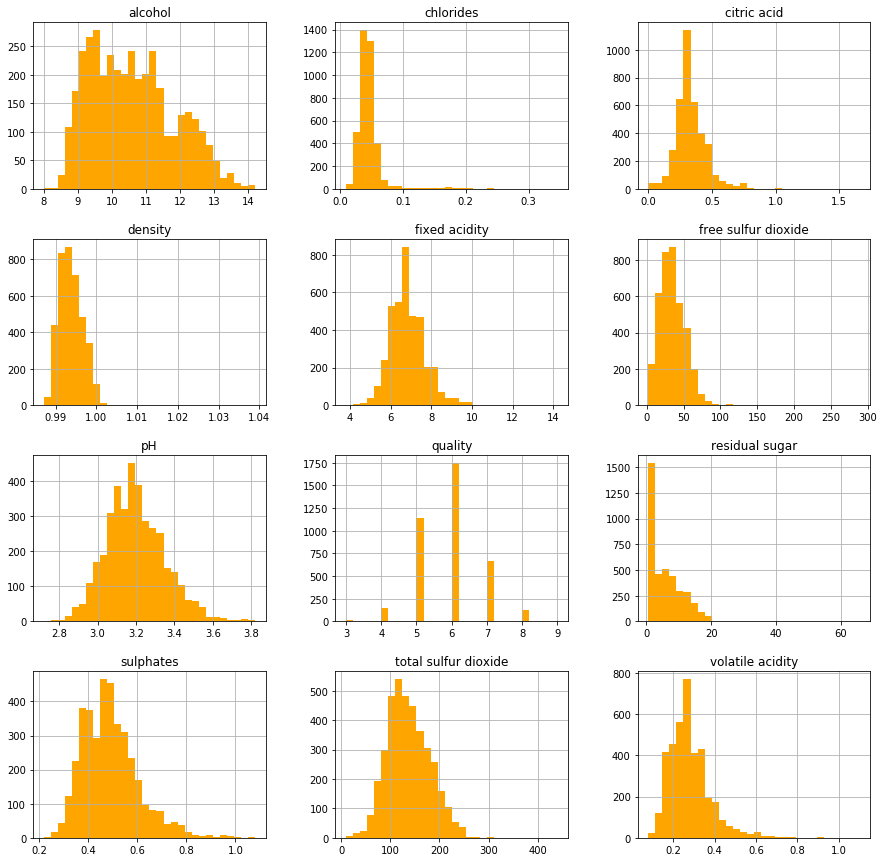

In [17]:
#plot the histogram using the hist keyword and display the findings.
df.hist(bins = 30, figsize=(15,15), color='orange')   #assign the size of histogram
plt.show()                                            # plot the histogram to visualize data

### Observations:
###### 1. A normal distribution is represented by wine quality data set with median at value 6.
###### 2. On a normally distributed scale most wines lie between pH value of 2.8-3.6
###### 3. A skewed distribution is represented by the attributes main attributes are chlorides, citric acid, density,residual sugar.
###### 4. Scales of each attribute vary differently.
###### 5. In resudual sugar and density outliesr possibility exist.

## Solution 2 solution is as follows:(Calculate correlation)

In [18]:
#plot the correlation matrix, with quality as the main value.
corr_matrix = df.corr()                               # make the correlation matrix
corr_matrix["quality"].sort_values(ascending=False)   # print the matrix in descending order

quality                 1.000000
alcohol                 0.462462
pH                      0.121414
sulphates               0.053600
free sulfur dioxide     0.010686
citric acid             0.007488
residual sugar         -0.118115
fixed acidity          -0.126015
total sulfur dioxide   -0.186236
volatile acidity       -0.196401
chlorides              -0.215595
density                -0.337404
Name: quality, dtype: float64

### Observation : 
#### 1.Most Positively correlated value : Alcohol
#### 2. Most Negatively correlated value : Density
#### 3. Second most negatively correlated value : Chlorides

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000153DFFF12C8>,
      dtype=object)

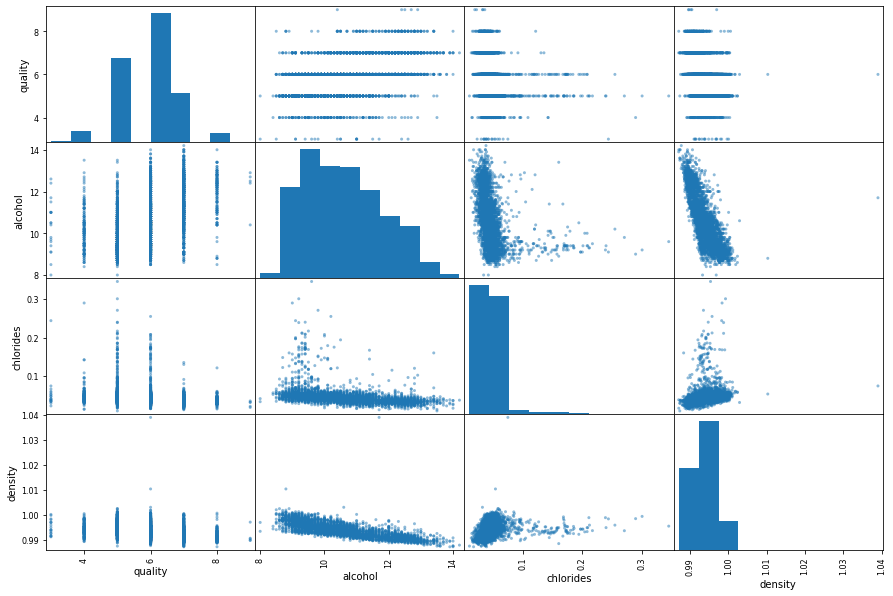

In [19]:
# from pandas.tools.plotting import scatter_matrix 
#import scatter plot from pandas
from pandas.plotting import scatter_matrix                      

# define the attributes
values = ["quality", "alcohol", "chlorides", "density"] 

 #plot the scatter plot
scatter_matrix(df[values], figsize=(15, 10))                   

### Observations are as follows:
##### 1. Alcolol- Strong Positive correlation-for 0.461% increase in volume wine quality increases by 1 unit.
##### 2. Chlorides- strong negative corelation- 0.215 g / dm^3 decrease results in 1 unit increase in  wine quality .
##### 3.Density - strong negative corelation-0.337 g / cm^3 decrease results in 1unit increase in wine quality .

## To make specific scatter plots as follows:
### Scatterplots of Alcohol , Chlorides and Density against quality.

### (a) Alcohol vs Quality : Strong positive correlation

Text(0, 0.5, 'quality')

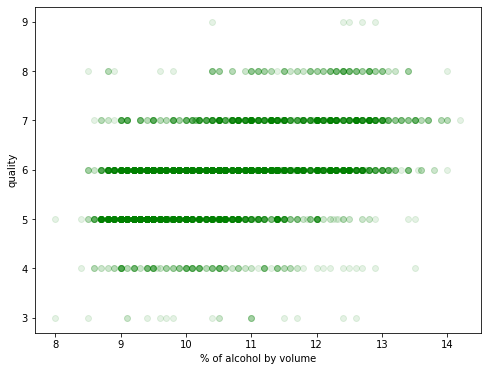

In [20]:
plt.figure(figsize=(8,6))                                        # determine figure size
plt.scatter(df['alcohol'], df['quality'], c = 'g', alpha = 0.1)  # assign values to the  plot
plt.xlabel('% of alcohol by volume')                             # define x axis
plt.ylabel('quality')                                            # define y axis

### Observation :
#### 1.Wines that have rank 8 and above have alcohol content 10.5 - 14% by volume
#### 2.For median quality wine i.e. rank 5-7 alcohol content is between 8.5 - 13.5%


### (b) Density vs Quality : Strong Negative Correlation


Text(0, 0.5, 'quality')

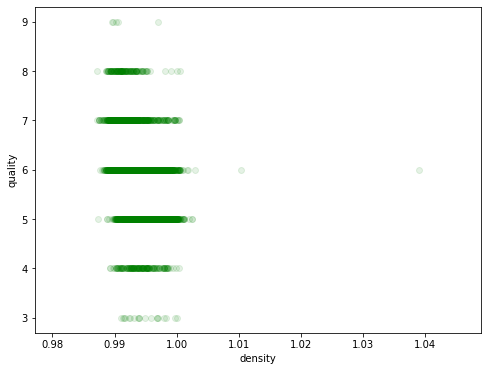

In [21]:
plt.figure(figsize=(8,6))                                              #determine figure size
plt.scatter(df['density'], df['quality'], color = 'g', alpha = 0.1)    # assign values
plt.xlabel('density')                                                  # label x axis
plt.ylabel('quality')                                                  # label y axis

### Observations :
#### 1.Density and wine quality show a mild negative correlation .
#### 2.The density range among all wines is around 0.01.
#### 3.Wines with rank 5-7 i.e. median quality wines has density range 0.985 to 1.005
#### 4.In high quality wines low density of 0.99 g / cm^3 is observed among all ranking.
#### 5.With values of 1.04 g / cm^3 density , may be considered as an outlier value.

### (c) Chlorides vs Quality : Strong Negative correlation

Text(0, 0.5, 'quality')

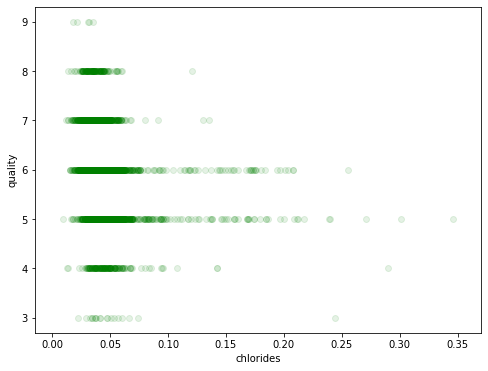

In [22]:
plt.figure(figsize=(8,6))                                       # determine figure size
plt.scatter(df['chlorides'], df['quality'], c='g', alpha = 0.1) # assign values
plt.xlabel('chlorides')                                         # label x axis
plt.ylabel('quality')                                           # label y axis

### Observations :
#### 1.Major top quality wines  of rank 8-9 has sodium chloride content below 0.05 g / dm^3 and show a negative correlation.
#### 2.Chloride content varies in median quality wines rank 5-7 from 0 to 0.35 g / dm^3, but majority stays around 0 to 0.1 g / dm^3.
#### 3.Inspite of  negative correlation between chloride content in wine, low chloride content is observed inall quality of wines, especially most low quality wine has low chloride content as well.

## Task 3: Predicting wine quality: baseline

### Aim : To perform predictions and do train-test split and use root mean squared error when evaluating our predictions. And  finally answer the following questions.
### Questions :
#### Question 1: What is the rmse for this predictor, when trained and tested on the training set?
#### Question 2: Why do we use regression rather than classification to predict quality? Would there be any advantages to treating this as a classification problem instead? Explain your answer

## Solution 1: Calculating RMSE

In [23]:
x = df[['fixed acidity','volatile acidity','citric acid','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]  # define  the attributes to be trained
y = df['quality']    # define attribute to be trained against

In [24]:
from sklearn.model_selection import train_test_split                                       #from sklearn impot traintest split module
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42) # define the size and assign seed value and do the splitting

In [25]:
print('Wine quality median value of training data is :', y_train.median())   # print the median value
print(y_train.describe())                                                    # describe the y train set

Wine quality median value of training data is : 6.0
count    3087.000000
mean        5.861030
std         0.896342
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


In [26]:
y_train_avg = y_train.copy()                                              # assign average value to a variable
y_train_avg[:] = 5.86103                                                  # indicate the average  value
import math as m                                                          # import math module
from sklearn.metrics import mean_squared_error                            # import MSE
RMSE = m.sqrt(mean_squared_error(y_true = y_train, y_pred = y_train_avg)) # calculate RMSE
print('The RMSE of the trained dataset is:', RMSE)                        # print RMSE

The RMSE of the trained dataset is: 0.8961968242053074


### Observation : The RMSE is 0.89

### Solution 2: Why we use a regression model?
Regression model is used to predict a continous value whereas a classification model predicts a discrete value . For wine quality data set is a ranking score mechanism for different weights of attributes and output is obtained in range of 0 to 10 . Hogh value means a good value . Thus wine quality can be viewed as a continous distribution and not a discrete one . Hence we may use a linear model for making predictions.
But we see that quality response variable is a discreet value.It is expected that this may result in
a less than optimal linear model due to the possible loss of fine-grained relationship information between the
inputs and the response, due to the clustering of continuous response values into the discrete integer
rankings.But,on the other hand, a classification algorithm is used in predicting a continuous value, the continuous value is
in the form of a probability for a class label, it is possible could be an advantage for analyse.

## Task 4 : Predicting wine quality

### Aim : To fit a linear regression model to the wine data set and examine its validity on the training data. Use tow more models KNN and Decision  Tree and test their validity.
#### To include :
##### 1. The rmse obtained using each model on the training data, for each of the various settings you tried.
##### 2. A plot of the results, showing some combination of actual quality, predicted quality and/or errors.
##### 3. Some comment on how the errors compare and why you think this might be the case.

### (a) Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression     # import linear regression model from sklearn library
lin_model = sklearn.linear_model.LinearRegression()   # assign a variable
lin_model.fit(x_train, y_train)                       # fit the model
lin_model_yhat = lin_model.predict(x_train)           # do predictions

In [28]:
from sklearn.metrics import mean_squared_error               #include MSE from sklearn
from math import sqrt                                        # import the square root function
lin_rmse = sqrt(mean_squared_error(y_train, lin_model_yhat)) #calculate RMSE
print(lin_rmse)                                              # print the output

0.7554955259218671


### Observations: 
#### 1. RMSE is observed to be 0.755, which is slightly better than pre-trained RMSE 0.896 by 0.141
#### 2.Linear model result from the linear regression says that the response variable quality can be explained as:= - 25.10507314 - 7.24190868 ( fixed acidity ) -1.79665806 ( volatile acidity ) + 1.35382655 ( citricacid ) -1.0775364 ( chlorides ) + 6.31156648 ( free sulfur dioxide ) -1.5945399 ( total sulfur dioxide )+ 2.73100377 ( density ) + 1.86932707 ( pH ) + 3.59257075 ( sulphates ) + 3.82365469 ( alcohol )

### Linear Model plotting actual quality VS predicted quality

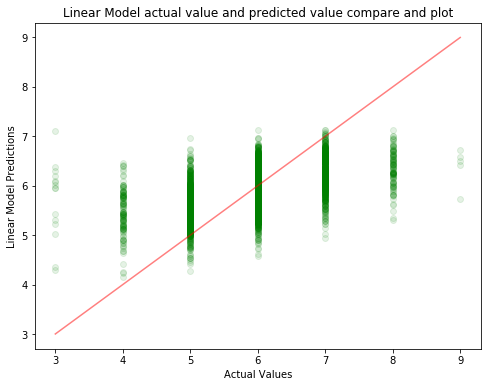

In [57]:
 # indicate figure size
plt.figure(figsize=(8,6)) 

# assign values to scatter plot
plt.scatter(y_train, lin_model_yhat, color = 'g',alpha=0.1)

# label x axis
plt.xlabel('Actual Values') 

 # label y axis
plt.ylabel('Linear Model Predictions')  

# give a title
plt.title('Linear Model actual value and predicted value compare and plot')

# enter the range of values
a = range(3,10,1)                                                      
b = range(3,10,1)

# plot the graph
plt.plot(a,b, color = 'r', label='True = Predict', alpha = 0.5)        

### Observations :( Comparing errors)
#### 1,We observe that linear model overrates low quality wines and underrates high quality wines.
#### 2.Highest residuals of linear model is observed at rank 4-7
#### 3.Residuals in high quality wines are narrowed in high quality wine (rank 8, 9)
#### 4.Because of smaller training samples samller errors are observed.

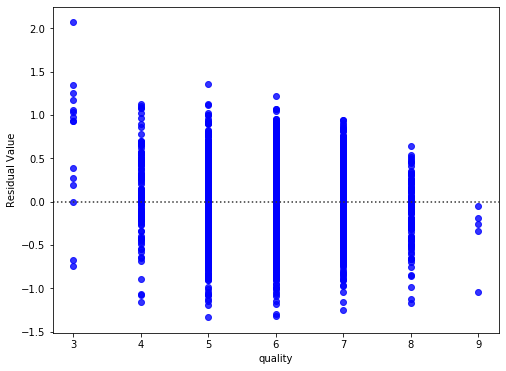

In [30]:
plt.figure(figsize=(8,6))                                  # assign figure size
plt.xlabel('Quality of Wine')                              # label x axis
plt.ylabel('Residual Value')                               # label y axis
sns.residplot(y_train, lin_model_yhat, color = 'blue')     # plot the residual graph

### (b)  K Nearest Neighbour Regression model

In [31]:
from sklearn.neighbors import KNeighborsRegressor                                # import KNN model
for g in range(1,11,1):                                                          # assign value in range
    neighbor = KNeighborsRegressor(n_neighbors= g)                               # assign neighbours
    neighbor.fit(x_train, y_train)                                               # fit the model
    neighbor_yhat = neighbor.predict(x_train)                                    # make predictions
    neighbor_rmse = sqrt(mean_squared_error(y_train, neighbor_yhat))             # calculate error
    print('neighbours are: ' + str(g) + ' neighbor_rmse: ' + str(neighbor_rmse)) # print neighbour values

neighbours are: 1 neighbor_rmse: 0.0
neighbours are: 2 neighbor_rmse: 0.5340677644879082
neighbours are: 3 neighbor_rmse: 0.6204124729664264
neighbours are: 4 neighbor_rmse: 0.6676074508682557
neighbours are: 5 neighbor_rmse: 0.6934185489980711
neighbours are: 6 neighbor_rmse: 0.7107116427389132
neighbours are: 7 neighbor_rmse: 0.7221740365807602
neighbours are: 8 neighbor_rmse: 0.7333758491076876
neighbours are: 9 neighbor_rmse: 0.7416499117621306
neighbours are: 10 neighbor_rmse: 0.7464981414703313


Text(0, 0.5, 'K_nearest_neighbors_Regressor_RMSE')

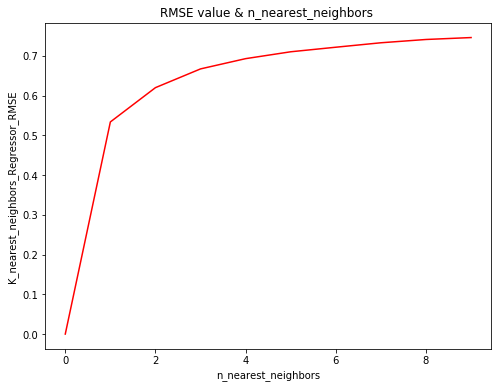

In [32]:
# assign figure size
plt.figure(figsize=(8,6))
#create empty list
list_rmse = []
#enter a range
for g in range(1,11,1):
    #call KNN function
    neighbor = KNeighborsRegressor(n_neighbors= g)
    #perform fitting
    neighbor.fit(x_train, y_train)
    #do predictions
    neighbor_yhat = neighbor.predict(x_train)
    #calculate RMSE
    neighbor_rmse = sqrt(mean_squared_error(y_train, neighbor_yhat))
    #append value to list
    list_rmse.append(neighbor_rmse)
o = range(10)
p = list_rmse
# plot the graph
plt.plot(o,p,color='r')
#give title
plt.title('RMSE value & n_nearest_neighbors ')
#lable x axis
plt.xlabel('n_nearest_neighbors')
#lable y axis
plt.ylabel('K_nearest_neighbors_Regressor_RMSE')

In [33]:
#call KNN function
neighbor3 = KNeighborsRegressor(n_neighbors= 3)
#fit the model
neighbor3.fit(x_train, y_train)
#do predictions
neighbor_yhat3 = neighbor3.predict(x_train)
#calculate RMSE
neighbor_rmse3 = sqrt(mean_squared_error(y_train, neighbor_yhat))
#print RMSE
neighbor_rmse3

0.7464981414703313

### Observations : 
#### 1.From running the KNeighbor Regressor model below, the lower n_neighbors may lower the error, yetresult in a overfitting model. The higher n_neighbor increases the error may result in underfitting model.
#### 2.Therefore we plot the graph of showing relation between n_neighbors and errors.n_neighbors = 3 is chosen as it is the optimised one

###  KNN actual quality and predicted quality comparision and then plot a graph

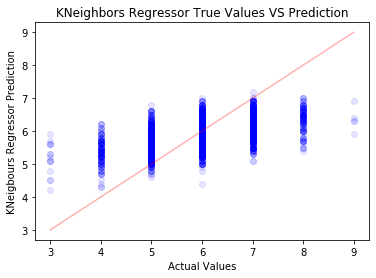

In [34]:
#give figure size
plt.figure(figsize=(6,4)) 

#call KNN function
neighbor3 = KNeighborsRegressor(n_neighbors= 3)

#fit the model
neighbor3.fit(x_train, y_train)

#do predictions
neighbor_yhat3 = neighbor.predict(x_train)

#plot scatter plot
plt.scatter(y_train, neighbor_yhat3, c='b', alpha = 0.1)

#lable x axis
plt.xlabel('Actual Values')

#label y axis
plt.ylabel('KNeigbours Regressor Prediction')

#give relevant title
plt.title('KNeighbors Regressor True Values VS Prediction')
q = range(3,10,1)
r = range(3,10,1)

#plot the graph
plt.plot(q,r, color = 'r', label='True = Predict', alpha = 0.3)

### Observations ( comparing errors) :
#### 1.For K_nearest_Neighbor neighbor = 3, RMSE = 0.6204
#### 2.KNeighbors regressor models tends to overrate low quality wine and underrate high quality wines
#### 3.Highest residual is observed at rank 4-7
#### 4.Residuals in high quality wines are narrowed in high quality wine (ranking 8, 9), and low quality wine(rank 3 & 4)
#### 5.Overrating and underrating are even in KNeighbor Regressor model for rank 4-7, and slight varies among other group
#### 6.As samples of both high and low quality wines are small thus errors are also small.

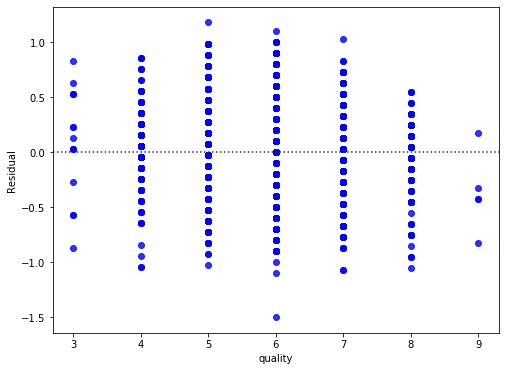

In [35]:
plt.figure(figsize=(8,6))
plt.xlabel('Wine quality')
plt.ylabel('Residual')
sns.residplot(y_train, neighbor_yhat3, color = 'blue')

### (c)  Decision Tree Model

In [36]:
from sklearn.tree import DecisionTreeRegressor                                        #import decision tree model
for attribute in range(1, 27, 1):                                                     # enter values 
    tree_model_test = sklearn.tree.DecisionTreeRegressor(max_depth=attribute)         # assign variable
    tree_model_test.fit(x_train, y_train)                                             # fit the model 
    y_prediction_test = tree_model_test.predict(x_train)                              # make predictions
    RMSE = sqrt(mean_squared_error(y_true = y_train, y_pred = y_prediction_test       # calculate the RMSE
    ))
    print('depth: ' + str(attribute) + ' RMSE ' + str(RMSE))                          # print the value

depth: 1 RMSE 0.8156167049610856
depth: 2 RMSE 0.7785346857016499
depth: 3 RMSE 0.7573165883099799
depth: 4 RMSE 0.7331751081584575
depth: 5 RMSE 0.7079438939715375
depth: 6 RMSE 0.6793311882247409
depth: 7 RMSE 0.6502999807592407
depth: 8 RMSE 0.6136624117331353
depth: 9 RMSE 0.5699564777184936
depth: 10 RMSE 0.5198453807496068
depth: 11 RMSE 0.4638445153424507
depth: 12 RMSE 0.4076169370791423
depth: 13 RMSE 0.3520405259253414
depth: 14 RMSE 0.2983718867492385
depth: 15 RMSE 0.24687651904572494
depth: 16 RMSE 0.19322536703053372
depth: 17 RMSE 0.14482528045429738
depth: 18 RMSE 0.11402591072906278
depth: 19 RMSE 0.0831074962555908
depth: 20 RMSE 0.06651061462702168
depth: 21 RMSE 0.057265606746280284
depth: 22 RMSE 0.04916686584747983
depth: 23 RMSE 0.0383213245791884
depth: 24 RMSE 0.0239299128840749
depth: 25 RMSE 0.016098176280543174
depth: 26 RMSE 0.0


### Observation : 
#### 1.To avoid overfitting, we try to plot the RMSE at depth levels from 1-27 to find the optimal depth level
#### 2.It shows a mild reverse sigmoid curve

In [37]:
#make empty list
RMSE_lst=[]
#append values in list
for attribute in range(1, 25, 1):
    tree_test = sklearn.tree.DecisionTreeRegressor(max_depth=attribute)
    tree_test.fit(x_train, y_train)
    y_prediction_test = tree_test.predict(x_train)
    RMSE = sqrt(mean_squared_error(y_true = y_train, y_pred = y_prediction_test
    ))
    #print RMSE
    RMSE_lst.append(RMSE)

Text(0.5, 1.0, 'RMSE in depth level of decision tree')

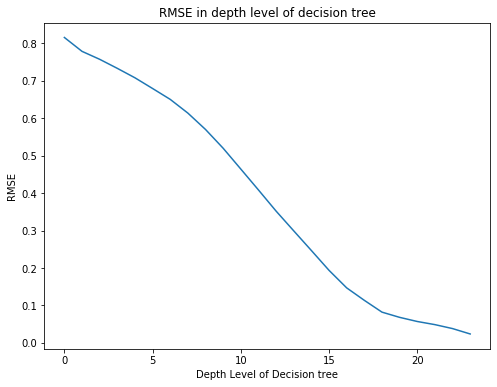

In [38]:
plt.figure(figsize=(8,6))
r = range(24)
plt.plot(r, RMSE_lst)
plt.xlabel('Depth Level of Decision tree')
plt.ylabel('RMSE')
plt.title('RMSE in depth level of decision tree')

### Observation :
#### Depth level of 8 is chosen after this point RMSE value declines steeply.This graph represents a reverse sigmoid grapg with a negative slope

In [39]:
tree_test_new = sklearn.tree.DecisionTreeRegressor(max_depth=8)                   # assign a variable
tree_test_new.fit(x_train, y_train)                                               # fit the model
y_prediction_test_new = tree_test_new.predict(x_train)                            # train the model
RMSE = sqrt(mean_squared_error(y_true = y_train, y_pred = y_prediction_test_new)) #calculate the RMSE value
print("The RMSE value is:" , RMSE)                                                # print the RMSE value

The RMSE value is: 0.6137283929793296


### Decision Tree Regressor Model plotting actual quality VS predicted quality

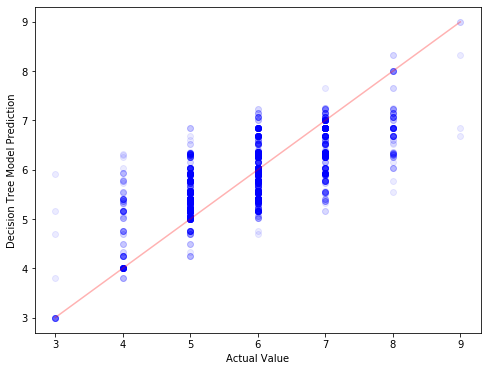

In [40]:
plt.figure(figsize=(8,6))                                             # assign size                                        
plt.scatter(y_train, y_prediction_test_new, c='b', alpha = 0.08)      # assign configurations
plt.xlabel('Actual Value')                                            #label x axis
plt.ylabel('Decision Tree Model Prediction')                          # label y axis
u = range(3,10,1)                                                     # enter range
v = range(3,10,1)
plt.plot(u,v, color = 'r', label='True = Predict', alpha = 0.3)       # plot the Graph

### Observations : (Compare Errors)
#### 1.RMSE of Decision tree has lower value than linear model and KNN model
#### 2.Decision tree  model overrates low quality wine and underrates high quality wine.
#### 3.Because of over fitting small errors occur


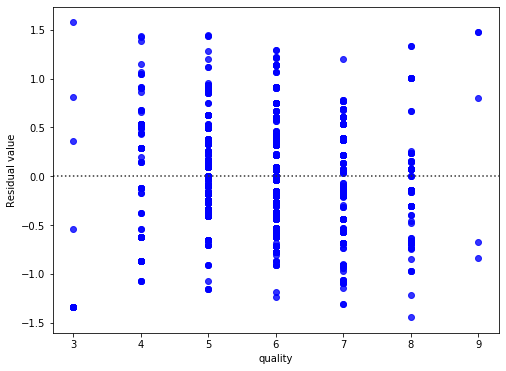

In [41]:
plt.figure(figsize=(8,6))                                      # assign size
plt.xlabel('Wine quality')                                     # label x axis
plt.ylabel('Residual value')                                         # label y axis
sns.residplot(y_train, y_prediction_test_new, color = 'blue')  # plot the graph

## Task 5: Cross validation


## Comparing Models (RMSE and Cross Validation) :
### (a) Linear Model

In [42]:
# import cross validation
from sklearn.model_selection import cross_val_score

#mark the scores and ass=ign variables
scores_lin_model = cross_val_score(lin_model, x_train, y_train, scoring = 'neg_mean_squared_error', cv =10)

# perform square root function
lin_model_scores = np.sqrt(-scores_lin_model)

# write print statements
print('For linear regression model:')         
print('RMSE:', lin_rmse)
print('CV Scores:', lin_model_scores)
print('Mean:', lin_model_scores.mean())
print('Standard deviation:', lin_model_scores.std())
print('CV scores is higher than RMSE by: ', lin_model_scores.mean()-lin_rmse )

For linear regression model:
RMSE: 0.7554955259218671
CV Scores: [0.7688     0.7444427  0.77996847 0.7288205  0.76103866 0.79906157
 0.74138741 0.78190409 0.74433912 0.7360522 ]
Mean: 0.7585814722003729
Standard deviation: 0.02200479787095591
CV scores is higher than RMSE by:  0.00308594627850578


### Observation: 
#### 1. RMSE and CV scores for linear model are almost similar, Crossvalidation is higher by 0.003 and linear model is about 0.75
#### 2. Cross validation splits the data in 10 splits as each set is tested against 9 other sets high error is observed

### (b) K Nearest Neighbour

Text(0, 0.5, 'KNN_CV scores')

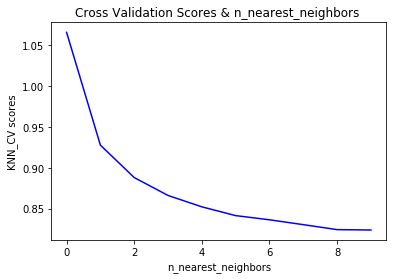

In [43]:
# make an empty list
list_neigh_scores = []

# iterate through loop
for v in range(1,11,1):
    #assign variable
    neigh = KNeighborsRegressor(n_neighbors= v)    
    # fit the model
    neigh.fit(x_train, y_train)                    
     # do predictions
    neigh_yhat = neigh.predict(x_train)           
    scores_neigh = cross_val_score(neigh, x_train, y_train, scoring = 'neg_mean_squared_error', cv =10)
    # compute sruare root
    neigh_scores = np.sqrt(-scores_neigh)  
    #calculate mean
    neigh_scores_mean = neigh_scores.mean()
    # append values to list
    list_neigh_scores.append(neigh_scores_mean)  
# Enter range of values
v = range(10)
w = list_neigh_scores
# plot the graph
plt.plot(v,w,color='b')
#give title
plt.title('Cross Validation Scores & n_nearest_neighbors ')
# assign x axis
plt.xlabel('n_nearest_neighbors')
#assign y axis
plt.ylabel('KNN_CV scores')

### Observations :
#### 1.As n_nearest_neighbor increases crossvalidation increases
#### 2.n_nearest_neighbors = 3 is considered as as optimal point in cross validation

### KNeighbors Regressor Cross Validation comparison

In [44]:
# assign values
scores_neigh3cv = cross_val_score(neighbor3, x_train, y_train, scoring = 'neg_mean_squared_error', cv =10)
#compute square
neighbor_scores3cv = np.sqrt(-scores_neigh3cv)
#assign print statements
print('For KNeighbors Regressor (n_nearest_neighbors = 3):')
#printRMSE
print('RMSE :', neighbor_rmse3)
#print CrossVal scores
print('CrossVal scores:', neighbor_scores3cv)
#print CrossVal mean
print('CrossVal score mean:', neighbor_scores3cv.mean())
#print CrossVal standard deviation
print('CrossVal score standard deviation:', neighbor_scores3cv.std())
# now compare values
print('CrossVal scores is higher than RMSE by:', neighbor_scores3cv.mean()- neighbor_rmse3)

For KNeighbors Regressor (n_nearest_neighbors = 3):
RMSE : 0.7464981414703313
CrossVal scores: [0.93611083 0.91964066 0.84058335 0.85899015 0.85353086 0.91198422
 0.89084198 0.87245817 0.90592884 0.89046577]
CrossVal score mean: 0.8880534825980291
CrossVal score standard deviation: 0.02957393821008179
CrossVal scores is higher than RMSE by: 0.14155534112769774


### Observations : 
#### 1.n_nearest_neighors = 3 used in both RMSE and Crass Validation score
#### 2.Difference between CrossVal scores (0.888) and RMSE (0.745) is 0.14155, which is slightly higher than linear model

### (c) Decision Tree Model 

In [45]:

#create an empty list
tree_score_lst=[]
#enter a range of values
for value in range(1, 25, 1):
    #set depth of decision tree
    tree_model_test = sklearn.tree.DecisionTreeRegressor(max_depth=value)
    #fit the model
    tree_model_test.fit(x_train, y_train)
    #make predictions
    y_prediction_test = tree_model_test.predict(x_train)
    # calculate the scores
    scores_tree = cross_val_score(tree_model_test, x_train, y_train, scoring ='neg_mean_squared_error', cv =10)
    #compute squareroot
    tree_rmse_scores = np.sqrt(-scores_tree)
    #calculate RMSE
    tree_rmse_scores_mean = tree_rmse_scores.mean()
    #append value to the list
    tree_score_lst.append(tree_rmse_scores_mean)

Text(0.5, 1.0, 'Depth level DecisionTree crossvalidation score')

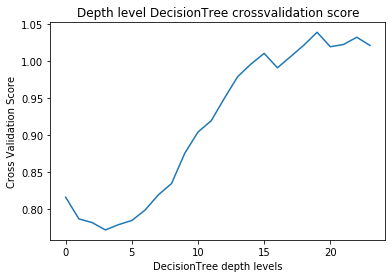

In [46]:
r= range(24)         #enter range 
t= tree_score_lst    # assign variable
plt.plot(r,t)        #plot the graph
plt.xlabel('DecisionTree depth levels')   #label x axis  
plt.ylabel('Cross Validation Score')      #label y axis
plt.title('Depth level DecisionTree crossvalidation score') #give a relevant title


### Observation and error compare :
#### 1.Decision tree cross validation score graph indicates clearly that the cv score hits the lowest at depth level 4
#### 2.Run RMSE at depth 4 for comparision
#### 3.Result shows both error stay similarly, RMSE 0.733 and cv scores 0.771, with 0.03 slightly higher in cross validation

In [47]:
#call decision tree regressor at depth 4
tree_model_test4 = sklearn.tree.DecisionTreeRegressor(max_depth=4)
#do cross vaidation
scores_tree4 = cross_val_score(tree_model_test4, x_train, y_train, scoring = 'neg_mean_squared_error', cv =10)
# obtain square root
tree_rmse_scores4 = np.sqrt(-scores_tree4)
#print the values
tree_rmse_scores4

array([0.81139798, 0.78025118, 0.73408693, 0.73593155, 0.73881779,
       0.82576762, 0.74671154, 0.77642168, 0.79385361, 0.77350415])

In [48]:
# call the decision tree regressor model
tree_model_test4 = sklearn.tree.DecisionTreeRegressor(max_depth=4)
# fit the model
tree_model_test4.fit(x_train, y_train)
# do predictions
y_prediction_test4 = tree_model_test4.predict(x_train)
#Running cv scores for max_depth = 4
scores_tree4 = cross_val_score(tree_model_test4, x_train, y_train, scoring = 'neg_mean_squared_error', cv =10)
#obtain square root
tree_rmse_scores4 = np.sqrt(-scores_tree4)
#Running RMSE for max_depth = 4
tree_RMSE4 = sqrt(mean_squared_error(y_true = y_train, y_pred = y_prediction_test4))
# asiign print statements
print('For decision model depth level = 4:')
print('RMSE :', tree_RMSE4)
print('CrossVal scores :', tree_rmse_scores4)
print('CrossV score mean:', tree_rmse_scores4.mean())
print('CrossVal score standard deviation:', tree_rmse_scores4.std())
print('CrossVal scores is higher than RMSE by:',tree_rmse_scores4.mean()-tree_RMSE4 )

For decision model depth level = 4:
RMSE : 0.7331751081584575
CrossVal scores : [0.81139798 0.78025118 0.73408693 0.73593155 0.73881779 0.82576762
 0.74671154 0.77642168 0.79385361 0.77350415]
CrossV score mean: 0.7716744018382082
CrossVal score standard deviation: 0.03080336418185851
CrossVal scores is higher than RMSE by: 0.03849929367975069


## Determining The Best model to work with:


In [49]:
model_compare = {'':['RMSE ', 'CV scores'], 'Linear_model':[lin_rmse,lin_model_scores.mean()], 'KNeigh_Regressor':[neighbor_rmse3, neighbor_scores3cv.mean()], 'Decision_Tree':[tree_RMSE4, tree_rmse_scores4.mean()]}
model_compare_df = pd.DataFrame(data = model_compare)
model_compare_df.set_index('')

,Linear_model,KNeigh_Regressor,Decision_Tree
,,,
RMSE,0.755496,0.746498,0.733175
CV scores,0.758581,0.888053,0.771674


### Observations(Most Suitable Model) :
#### 1.Mean squared error in cross validation is higher than the rmse run in task 4 for all 3 models
#### 2.Compared to RMSE, decision tree model performs little better than knearest neighbor regressor and linear model.
#### 3.But when compared to mean squared error in cross validation test, linear model performs better than decision tree model. Kneighbor regressor performing worst.
#### 4.Cross validation is a quite accurate approach for measuring the accuracy of model. Therefore now we are comparing between linear model and decision tree model. Since decision tree has been run with the lowest mean squared error depth of 4 with an error of 0.771674 in cross validation test, (shown at the above graph), we consider linear model (cv score 0.7585) the most suitable model in this scenario.
#### 5.The less parameter linear model are less prone to overfitting. Yet in this case is more the problem of underfitting. Next step we would like to improve on the fitting of model.


## Task 6 - Free choice
#### In this section we can perform the following tasks
##### - Try different models
##### - Tune existing model with different parameters
##### - Performance of best model on test data

### Try Random Forrest Regressor Model 

In [50]:
#import the random forrest model
from sklearn.ensemble import RandomForestRegressor
#assign a variable
forest_reg = RandomForestRegressor()
#fit the model
forest_reg.fit(x_train, y_train)
# do predictions
forest_reg_yhat = forest_reg.predict(x_train)
# find squareroot
forest_rmse = sqrt(mean_squared_error(y_true = y_train, y_pred = forest_reg_yhat))
#do cross validations
forest_score = cross_val_score(forest_reg, x_train, y_train, scoring = 'neg_mean_squared_error', cv =10)
#find squareroot
forest_score_sqrt = np.sqrt(-forest_score)
#assign print statements
print('RMSE:', forest_rmse)
print('CV scores:', forest_score_sqrt)
print('CV scores mean:', forest_score_sqrt.mean())
print('CV scores standard deviation:', forest_score_sqrt.std())

C:\Users\npath\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 0.31693380374652375
CV scores: [0.77930348 0.75003776 0.71030328 0.72923243 0.70644284 0.78629029
 0.75143875 0.77915205 0.76969803 0.69457546]
CV scores mean: 0.7456474372085959
CV scores standard deviation: 0.03194117342304071


In [51]:
#To find the best fit parameter GridSearch is used
# import grid search
from sklearn.model_selection import GridSearchCV
# make parameters
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a relevant  model
grid_search = GridSearchCV(estimator = forest_reg, param_grid = param_grid,
cv = 3, n_jobs = -1, verbose = 2)

In [52]:
#fit the model
grid_search.fit(x_train, y_train)
#perform grid search
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.2min finished


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 200}

In [53]:
#call random forrest regressor
forest_reg1 = RandomForestRegressor(bootstrap= True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200)
#fit the model
forest_reg1.fit(x_train, y_train)
# do predictions
forest_reg_yhat1 = forest_reg.predict(x_train)
#find square root
forest_rmse1 = sqrt(mean_squared_error(y_true = y_train, y_pred = forest_reg_yhat1))
#do cross validations
forest_score1 = cross_val_score(forest_reg1, x_train, y_train, scoring = 'neg_mean_squared_error', cv =10)
#find Squareroot
forest_score_sqrt1 = np.sqrt(-forest_score1)
#assign print statements
print('RMSE:', forest_rmse1)
print('CV scores:', forest_score_sqrt1)
print('CV scores mean:', forest_score_sqrt1.mean())
print('CV scores standard deviation:', forest_score_sqrt1.std())

RMSE: 0.31693380374652375
CV scores: [0.73899181 0.71971432 0.69187989 0.68877334 0.6775557  0.75156927
 0.70132764 0.70904501 0.72484665 0.68855665]
CV scores mean: 0.709226028657772
CV scores standard deviation: 0.022901550727414583


## Comparing Results

In [54]:
model_compare = {'':['RMSE ', 'CV scores'], 'Linear_model':[lin_rmse,lin_model_scores.mean()], 'KNeigh_Regressor':[neighbor_rmse3, neighbor_scores3cv.mean()], 'Decision_Tree':[tree_RMSE4, tree_rmse_scores4.mean()], 'Forest_Regressor':[forest_rmse1, forest_score_sqrt1.mean()]}
model_compare_df = pd.DataFrame(data = model_compare)
model_compare_df.set_index('')

,Linear_model,KNeigh_Regressor,Decision_Tree,Forest_Regressor
,,,,
RMSE,0.755496,0.746498,0.733175,0.316934
CV scores,0.758581,0.888053,0.771674,0.709226


### Testing the best model

In [55]:
#Test the model with data test set
forest_regt = RandomForestRegressor(bootstrap= True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=200)
#fit the model
forest_regt.fit(x_train, y_train)
#do predictions
forest_reg_yhatt = forest_reg.predict(x_test)
#find squareroot
forest_rmset = sqrt(mean_squared_error(y_true = y_test, y_pred = forest_reg_yhatt))
#do cross validations
forest_scoret = cross_val_score(forest_regt, x_test, y_test, scoring = 'neg_mean_squared_error', cv =10)
#calculate squareroot
forest_score_sqrtt = np.sqrt(-forest_scoret)
#assign print statements
print('Testing the model on test set:')
print('RMSE:', forest_rmset)
print('CV scores:', forest_score_sqrtt)
print('CV scores mean:', forest_score_sqrtt.mean())
print('CV scores standard deviation:', forest_score_sqrtt.std())

Testing the model on test set:
RMSE: 0.7091829203440901
CV scores: [0.61252424 0.70712738 0.71535027 0.87071872 0.65155835 0.65909924
 0.64563997 0.7011548  0.80006853 0.62523195]
CV scores mean: 0.698847344921347
CV scores standard deviation: 0.07723329498324207


In [56]:
#assign print statements
print('Compared with the baseline RMSE:')
#do required improvement with abs value function
Perform_improvement = abs(forest_score_sqrt1.mean() - RMSE/RMSE)
print("Prediction performance with Random Forest Regressor has been improved by:"+"{:.2%}".format(Perform_improvement))
print()
#calculate errors
errors = abs(forest_reg_yhatt - y_test)
print('Average absolute error on test set:', round(np.mean(errors), 2))
print()
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Compared with the baseline RMSE:
Prediction performance with Random Forest Regressor has been improved by:29.08%

Average absolute error on test set: 0.55

Accuracy: 90.16 %.


## Observations :
#### Till now, the model gives the best performance in running the test set with 0.70 mean squared error in cross validation.
#### Compared with other model in previous section - linear model, random forest regressor is improved by 9% reduction in mean squared error.
#### Compared with pre-trained baseline RMSE, the model prediction performance has been improved by 29%.
### Thus Random Forest Regressor is the best model.